In [5]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Picking some sample data only as original file is too big


In [85]:
input_file = "C:\\Users\\siddharth bhagwat\\Documents\\PRODIGY_DS_05\\Data\\US_Accidents.csv"


In [86]:
output_file = "C:\\Users\\siddharth bhagwat\\Documents\\PRODIGY_DS_05\\data\\cleaned_US_Accidents.csv"


In [87]:
# Read only first 500,000 rows
df_sample = pd.read_csv(input_file, nrows=500000)

In [88]:
# Save to new file
df_sample.to_csv(output_file, index=False)


## EDA


In [6]:
data = pd.read_csv(r"C:\Users\siddharth bhagwat\Documents\PRODIGY_DS_05\Data\cleaned_US_Accidents.csv" )

In [4]:
data.head(10)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
data["Start_Time"] = pd.to_datetime(data["Start_Time"], errors="coerce")


In [6]:
data["hour"] = data["Start_Time"].dt.hour


In [7]:
bins = [0, 5, 12, 17, 21, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening", "Night"]

data["time_of_day"] = pd.cut(
    data["hour"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


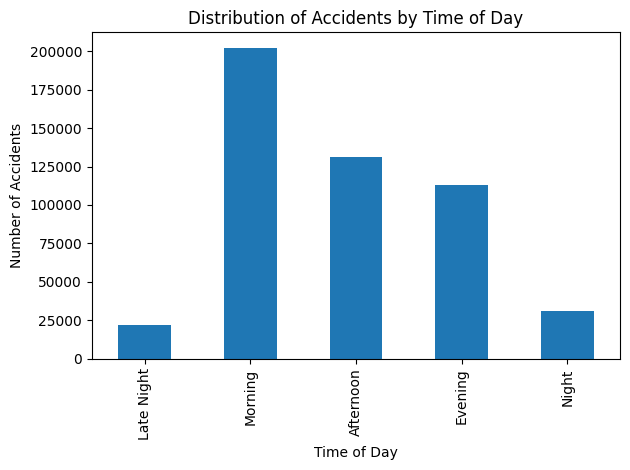

In [8]:
counts = data["time_of_day"].value_counts().sort_index()

# Plot
plt.figure()
counts.plot(kind="bar")
plt.title("Distribution of Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

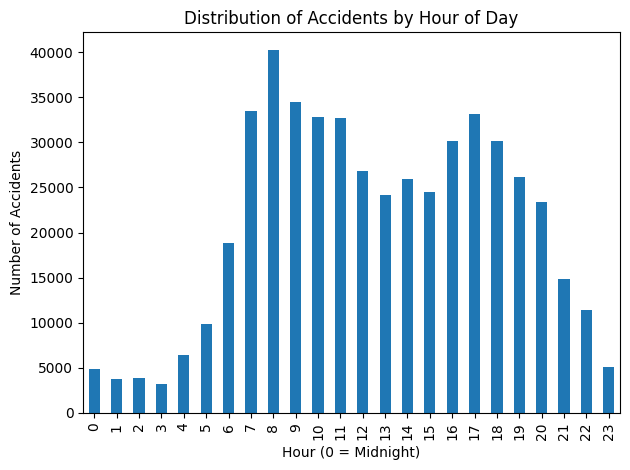

In [9]:
hour_counts = data["hour"].value_counts().sort_index()

plt.figure()
hour_counts.plot(kind="bar")
plt.title("Distribution of Accidents by Hour of Day")
plt.xlabel("Hour (0 = Midnight)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


### Day vs Night Risk Analysis

In [10]:
data.groupby("Sunrise_Sunset")["Severity"].count() / sum(data.groupby("Sunrise_Sunset")["Severity"].count()) * 100


Sunrise_Sunset
Day      72.882207
Night    27.117793
Name: Severity, dtype: float64

<Axes: title={'center': 'Accident Percentage by Time of Day'}>

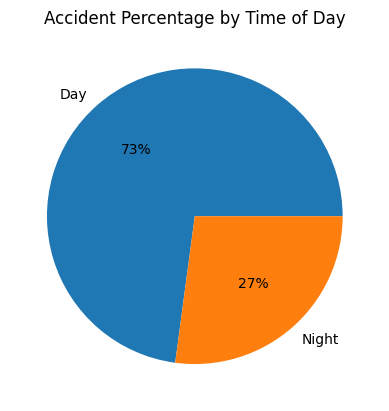

In [14]:
(data.groupby("Sunrise_Sunset")
     .size()
     .div(len(data)) * 100
).plot(kind="pie", title="Accident Percentage by Time of Day", autopct='%.0f%%')


In [100]:
data.groupby("Sunrise_Sunset")["Severity"].mean()


Sunrise_Sunset
Day      2.364124
Night    2.403126
Name: Severity, dtype: float64

<Axes: title={'center': 'Sunrise_Sunset and Severity'}, ylabel='Severity'>

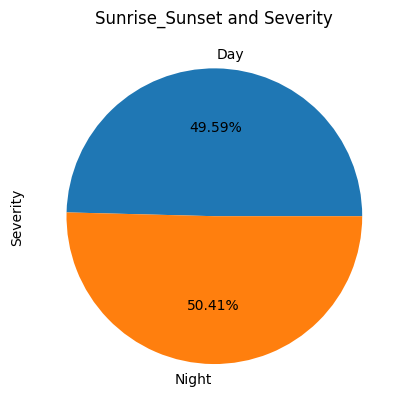

In [18]:
(data.groupby("Sunrise_Sunset")["Severity"].mean()).plot(kind="pie", title="Sunrise_Sunset and Severity", autopct='%1.2f%%')

### Conclusion
Fewer accidents at night, but more serious when they happen

In [19]:
data[["Traffic_Signal", "Severity"]].dropna().head()
data["Traffic_Signal"] = data["Traffic_Signal"].astype(bool)
data["Severity"] = pd.to_numeric(data["Severity"], errors="coerce")

In [20]:
severity_mean = data.groupby("Traffic_Signal")["Severity"].mean()
print(severity_mean)


Traffic_Signal
False    2.450056
True     2.122140
Name: Severity, dtype: float64


<Axes: title={'center': 'Traffic_signal and Severity'}, xlabel='Traffic_Signal'>

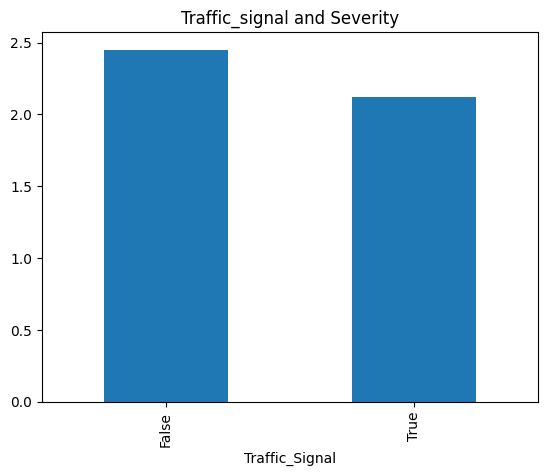

In [23]:
severity_mean.plot(kind="bar", title="Traffic_signal and Severity")

### Conclusion: Signals reduces the severity
Accidents occurring at locations without traffic signals show a higher proportion of high-severity incidents (Severity 3–4), indicating that controlled intersections reduce the likelihood of major traffic disruption and severe collisions

In [24]:
data["High_Severity"] = data["Severity"] >= 3

pd.crosstab(
    data["Traffic_Signal"],
    data["High_Severity"],
    normalize="index"
) * 100


High_Severity,False,True
Traffic_Signal,,
False,54.973603,45.026397
True,87.761602,12.238398


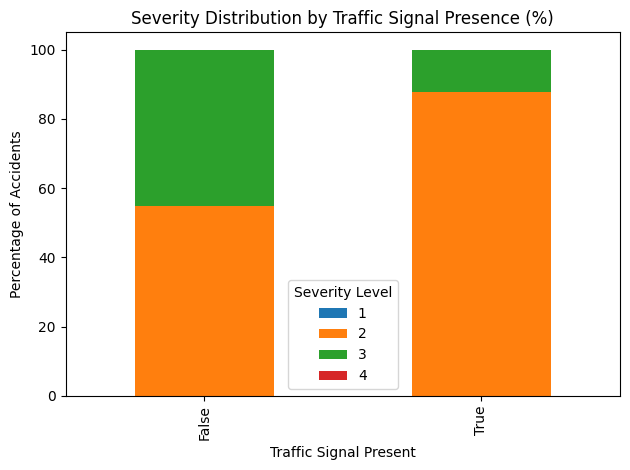

In [25]:
ct = pd.crosstab(data["Traffic_Signal"], data["Severity"], normalize="index") * 100

ct.plot(kind="bar", stacked=True)
plt.title("Severity Distribution by Traffic Signal Presence (%)")
plt.xlabel("Traffic Signal Present")
plt.ylabel("Percentage of Accidents")
plt.legend(title="Severity Level")
plt.tight_layout()
plt.show()

In [26]:
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour,time_of_day,High_Severity
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Night,5,Morning,True
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Day,6,Morning,False
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,True,False,Night,Night,Day,Day,6,Morning,False
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,Night,Day,Day,Day,7,Morning,True
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,True,False,Day,Day,Day,Day,7,Morning,False
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,Day,Day,Day,Day,7,Morning,True
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,Day,Day,Day,Day,7,Morning,False
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,Day,Day,Day,Day,7,Morning,True
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,Day,Day,Day,Day,8,Morning,False
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,Day,Day,Day,Day,8,Morning,True


<Axes: xlabel='year wise accidents'>

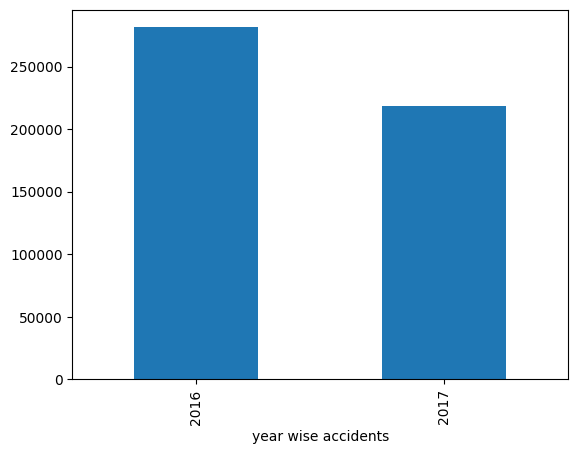

In [73]:
data["Year"] = data["Start_Time"].dt.year
year_wise_accidents = data.groupby("Year")["High_Severity"].count()
year_wise_accidents.plot(kind="bar", xlabel="year wise accidents" )


<Axes: xlabel='Month wise accidents'>

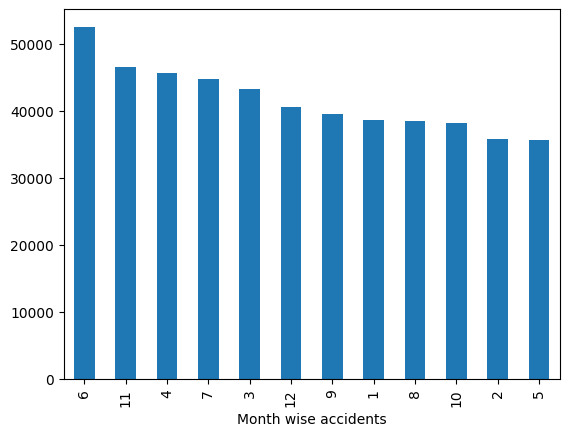

In [71]:
data["Month"] = data["Start_Time"].dt.month
month_wise_accidents = data.groupby("Month")["Severity"].count()
month_wise_accidents_sorted = month_wise_accidents.sort_values(ascending=False)
month_wise_accidents_sorted.plot(kind="bar", xlabel="Month wise accidents" )

In [7]:
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


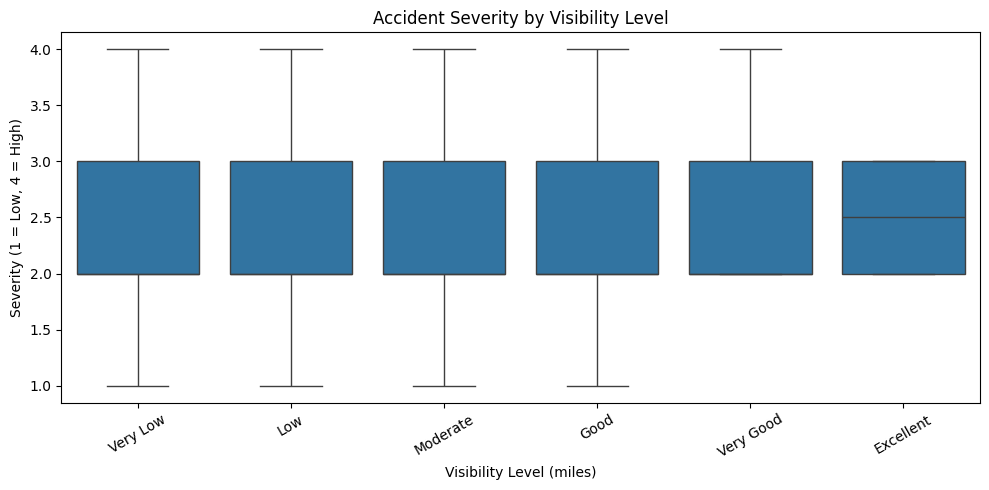

In [ ]:
data["Visibility_Bin"] = pd.cut(
    data["Visibility(mi)"],
    bins=[ 1, 2, 3, 4, 20, 100],
    labels=["Very Low", "Low", "Moderate", "Good", "Very Good", "Excellent"]
)

plt.figure(figsize=(10,5))
sns.boxplot(
    x="Visibility_Bin",
    y="Severity",
    data=data
)
plt.title("Accident Severity by Visibility Level")
plt.xlabel("Visibility Level (miles)")
plt.ylabel("Severity (1 = Low, 4 = High)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

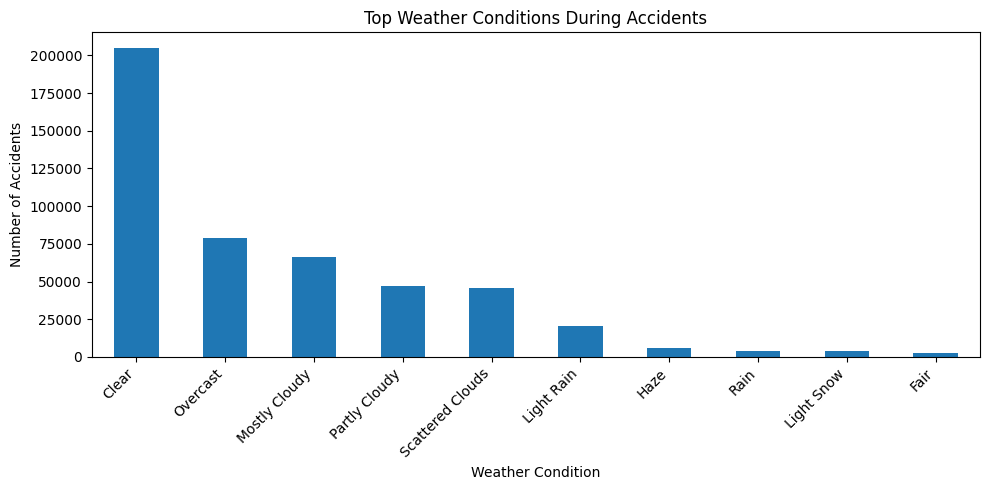

In [9]:
plt.figure(figsize=(10,5))

# Top 10 weather conditions
weather_counts = data["Weather_Condition"].value_counts().head(10)

weather_counts.plot(kind="bar")
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

import os

os.makedirs("images", exist_ok=True)

In [19]:

# Take a random sample for performance (maps get slow if too many points)
map_data = data[["Start_Lat", "Start_Lng"]].dropna().sample(20000, random_state=42)

# Create base map (center of USA)
m = folium.Map(location=[37, -95], zoom_start=4, tiles="CartoDB positron")

# Add heat layer
HeatMap(
    map_data.values.tolist(),
    radius=8,
    blur=15,
    max_zoom=10
).add_to(m)

# Save map
m.save("C:\\Users\\siddharth bhagwat\\Documents\\PRODIGY_DS_05\\images\\accident_hotspots.html")


print("Hotspot map saved to images/accident_hotspots.html")


Hotspot map saved to images/accident_hotspots.html
